In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras import utils as np_utils

from utils.data import extract_eeg_data, multi_to_binary_classification, split_dataset, dict_to_arr
from utils.labels import get_pss_labels, get_stai_labels
from utils.valid_recs import get_valid_recs
from features import all_features, hjorth_features
from classifiers import knn_classification, svm_classification, cnn_classification, EEGNet_classification_2
import utils.variables as v

from EEGModels import EEGNet


In [24]:
valid_recs = get_valid_recs(data_type='ica', output_type = 'np')
print(f'Valid recs {valid_recs}')

x_dict_ = extract_eeg_data(valid_recs, data_type='ica', output_type='np')


Filtering out invalid recordings



ERROR:root:1) Failed to read data for recording P006_S002_001
ERROR:root:1) Failed to read data for recording P006_S002_002


Data/ICA_data\sub-P010_ses-S001_run-001.mat not valid
Data/ICA_data\sub-P013_ses-S001_run-001.mat not valid
Data/ICA_data\sub-P013_ses-S001_run-002.mat not valid
Data/ICA_data\sub-P020_ses-S001_run-001.mat not valid
Data/ICA_data\sub-P023_ses-S002_run-002.mat not valid


ERROR:root:1) Failed to read data for recording P028_S001_001
ERROR:root:1) Failed to read data for recording P028_S001_002


Returning valid recordings

Valid recs ['P001_S001_001', 'P001_S001_002', 'P001_S002_001', 'P001_S002_002', 'P002_S001_001', 'P002_S001_002', 'P002_S002_001', 'P002_S002_002', 'P003_S001_001', 'P003_S001_002', 'P003_S002_001', 'P003_S002_002', 'P004_S001_001', 'P004_S001_002', 'P004_S002_001', 'P004_S002_002', 'P005_S001_001', 'P005_S001_002', 'P005_S002_001', 'P005_S002_002', 'P006_S001_001', 'P006_S001_002', 'P007_S001_001', 'P007_S001_002', 'P007_S002_001', 'P007_S002_002', 'P008_S001_001', 'P008_S001_002', 'P008_S002_001', 'P008_S002_002', 'P009_S001_001', 'P009_S001_002', 'P009_S002_001', 'P009_S002_002', 'P010_S001_002', 'P010_S002_001', 'P010_S002_002', 'P011_S001_001', 'P011_S001_002', 'P011_S002_001', 'P011_S002_002', 'P012_S001_001', 'P012_S001_002', 'P012_S002_001', 'P012_S002_002', 'P013_S002_001', 'P013_S002_002', 'P014_S001_001', 'P014_S001_002', 'P014_S002_001', 'P014_S002_002', 'P015_S001_001', 'P015_S001_002', 'P015_S002_001', 'P015_S002_002', 'P016_S001_001', 'P016_S0

In [25]:
y_dict_ = get_stai_labels(valid_recs) 
#y_dict = get_pss_labels(valid_recs)

    SubjectNo  D1Y1  D2Y1  J1Y1  J2Y1
0           1    26    30    29    31
1           2    38    41    26    34
2           3    58    56    36    35
3           4    40    45    24    24
4           5    25    31    38    37
5           6    49    58     0     0
6           7    56    50    28    28
7           8    46    37    23    27
8           9    41    47    27    22
9          10    37    20    23    21
10         11    50    49    31    47
11         12    42    47    47    41
12         13    35    35    28    33
13         14    54    35    26    26
14         15    51    55    33    42
15         16    35    38    42    45
16         17    37    35    24    20
17         18    54    62    41    48
18         19    47    52    30    36
19         20    46    38    24    25
20         21    44    54    33    39
21         22    49    51    28    34
22         23    56    53    33    28
23         24    52    58    36    41
24         25    48    62    29    56
25         2

In [26]:
print(f" Length of data after removing invalid labels: {len(x_dict_)}")
print(f" Lenght og labels after removing invalid labels: {len(y_dict_)}")


 Length of data after removing invalid labels: 103
 Lenght og labels after removing invalid labels: 103


In [27]:
x_dict, y_dict = multi_to_binary_classification(x_dict_, y_dict_)


The extracted keys : 
['P002_S001_001', 'P002_S001_002', 'P004_S001_001', 'P004_S001_002', 'P005_S002_001', 'P005_S002_002', 'P008_S001_002', 'P009_S001_001', 'P012_S001_001', 'P012_S002_002', 'P015_S002_002', 'P016_S001_002', 'P016_S002_001', 'P016_S002_002', 'P017_S001_001', 'P018_S002_001', 'P020_S001_002', 'P021_S001_001', 'P021_S002_002', 'P024_S002_002', 'P026_S001_001', 'P026_S001_002', 'P027_S001_002', 'P027_S002_001']

Dictionary after removal of keys from y_dict: 
 dict_keys(['P001_S001_001', 'P001_S001_002', 'P001_S002_001', 'P001_S002_002', 'P002_S002_001', 'P002_S002_002', 'P003_S001_001', 'P003_S001_002', 'P003_S002_001', 'P003_S002_002', 'P004_S002_001', 'P004_S002_002', 'P005_S001_001', 'P005_S001_002', 'P006_S001_001', 'P006_S001_002', 'P007_S001_001', 'P007_S001_002', 'P007_S002_001', 'P007_S002_002', 'P008_S001_001', 'P008_S002_001', 'P008_S002_002', 'P009_S001_002', 'P009_S002_001', 'P009_S002_002', 'P010_S001_002', 'P010_S002_001', 'P010_S002_002', 'P011_S001_001'

In [28]:
print(f" Length of data after removing mildly stressed subjects: {len(x_dict_)}")
print(f" Lenght og labels after removing  mildly stressed subjects: {len(y_dict_)}")

 Length of data after removing mildly stressed subjects: 79
 Lenght og labels after removing  mildly stressed subjects: 79


In [29]:
train_data_dict, test_data_dict, val_data_dict, train_labels_dict, test_labels_dict, val_labels_dict = split_dataset(x_dict, y_dict)

In [30]:
print(f"Length of train data set: {len(train_data_dict)}")
print(f"Length of validation data set: {len(val_data_dict)}")
print(f"Length of test data set: {len(test_data_dict)}")

Length of train data set: 47
Length of validation data set: 16
Length of test data set: 16


In [31]:
train_data_arr = dict_to_arr(train_data_dict)
test_data_arr = dict_to_arr(test_data_dict)
val_data_arr = dict_to_arr(val_data_dict)

train_labels_arr = np.reshape(np.array(list(train_labels_dict.values())), (len(train_data_arr),1))
test_labels_arr = np.reshape(np.array(list(test_labels_dict.values())), (len(test_data_arr),1))
val_labels_arr = np.reshape(np.array(list(val_labels_dict.values())), (len(val_data_arr),1))

train_labels_arr[train_labels_arr == 2] = 1
test_labels_arr[test_labels_arr == 2] = 1
val_labels_arr[val_labels_arr == 2] = 1


print(f"Shape of train data set: {train_data_arr.shape}")
print(f"Shape of validation data set: {val_data_arr.shape}")
print(f"Shape of test data set: {test_data_arr.shape}")

Shape of train data set: (47, 8, 75000)
Shape of validation data set: (16, 8, 75000)
Shape of test data set: (16, 8, 75000)


In [32]:
print(train_labels_arr.shape)
print(val_labels_arr.shape)
print(test_labels_arr.shape)

(47, 1)
(16, 1)
(16, 1)


In [33]:
"""# convert labels to one-hot encodings.
train_labels = np_utils.to_categorical(train_labels_arr-1)
val_labels   = np_utils.to_categorical(val_labels_arr-1)
test_labels  = np_utils.to_categorical(test_labels_arr-1)

# convert data to NHWC (trials, channels, samples, kernels) format. Data 
# contains 60 channels and 151 time-points. Set the number of kernels to 1.
kernels = 1

train_data      = train_data_arr.reshape(train_data_arr.shape[0], v.NUM_CHANNELS, v.NUM_SAMPLES, kernels)
val_data        = val_data_arr.reshape(val_data_arr.shape[0], v.NUM_CHANNELS, v.NUM_SAMPLES, kernels)
test_data       = test_data_arr.reshape(test_data_arr.shape[0], v.NUM_CHANNELS, v.NUM_SAMPLES, kernels)"""
   

'# convert labels to one-hot encodings.\ntrain_labels = np_utils.to_categorical(train_labels_arr-1)\nval_labels   = np_utils.to_categorical(val_labels_arr-1)\ntest_labels  = np_utils.to_categorical(test_labels_arr-1)\n\n# convert data to NHWC (trials, channels, samples, kernels) format. Data \n# contains 60 channels and 151 time-points. Set the number of kernels to 1.\nkernels = 1\n\ntrain_data      = train_data_arr.reshape(train_data_arr.shape[0], v.NUM_CHANNELS, v.NUM_SAMPLES, kernels)\nval_data        = val_data_arr.reshape(val_data_arr.shape[0], v.NUM_CHANNELS, v.NUM_SAMPLES, kernels)\ntest_data       = test_data_arr.reshape(test_data_arr.shape[0], v.NUM_CHANNELS, v.NUM_SAMPLES, kernels)'

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.67070, saving model to /tmp\checkpoint.h5
3/3 - 21s - loss: 0.8938 - accuracy: 0.5319 - val_loss: 0.6707 - val_accuracy: 0.6250 - 21s/epoch - 7s/step
Epoch 2/100

Epoch 2: val_loss did not improve from 0.67070
3/3 - 15s - loss: 0.2337 - accuracy: 0.9787 - val_loss: 0.6995 - val_accuracy: 0.5000 - 15s/epoch - 5s/step
Epoch 3/100

Epoch 3: val_loss did not improve from 0.67070
3/3 - 16s - loss: 0.1559 - accuracy: 1.0000 - val_loss: 0.6922 - val_accuracy: 0.5625 - 16s/epoch - 5s/step
Epoch 4/100

Epoch 4: val_loss did not improve from 0.67070
3/3 - 16s - loss: 0.0988 - accuracy: 1.0000 - val_loss: 0.6828 - val_accuracy: 0.6250 - 16s/epoch - 5s/step
Epoch 5/100

Epoch 5: val_loss did not improve from 0.67070
3/3 - 16s - loss: 0.0769 - accuracy: 1.0000 - val_loss: 0.6783 - val_accuracy: 0.5625 - 16s/epoch - 5s/step
Epoch 6/100

Epoch 6: val_loss did not improve from 0.67070
3/3 - 16s - loss: 0.0512 - accuracy: 1.0000 - val_loss: 0.6759 -

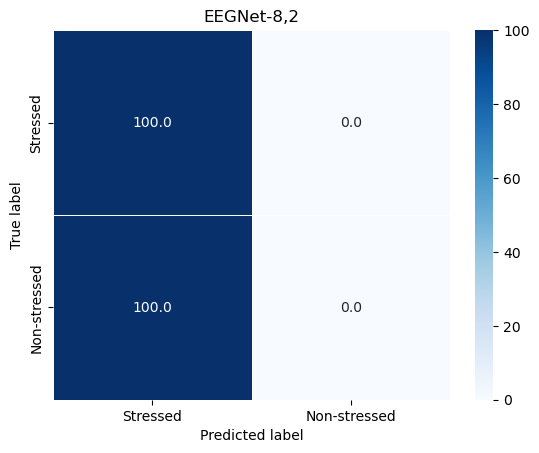

In [34]:
probs = EEGNet_classification_2(train_data_arr, test_data_arr, val_data_arr, train_labels_arr, test_labels_arr, val_labels_arr)

In [35]:
print(probs)

[[0.39886215 0.6011375 ]
 [0.6464811  0.35351995]
 [0.4629143  0.53708446]
 [0.6750899  0.32490867]
 [0.4872628  0.51273775]
 [0.8336997  0.1662993 ]
 [0.69691473 0.30308598]
 [0.40409964 0.5959012 ]
 [0.5468898  0.45311314]
 [0.4870379  0.5129626 ]
 [0.4642423  0.53575855]
 [0.48638898 0.51361233]
 [0.46892503 0.5310738 ]
 [0.5835558  0.41644326]
 [0.76842844 0.23157352]
 [0.81097144 0.18903027]]


In [36]:
preds = probs.argmax(axis = -1)  
print(preds)

print(test_labels_arr.T)

[1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0]
[[1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0]]


<AxesSubplot:title={'center':'EEGNet-8,2'}, xlabel='Predicted label', ylabel='True label'>

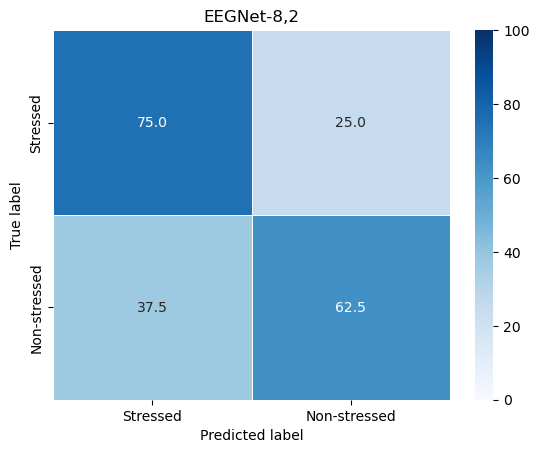

In [43]:
from pyriemann.utils.viz import plot_confusion_matrix

plot_confusion_matrix(preds, test_labels_arr, ['Stressed', 'Non-stressed'], title = 'EEGNet-8,2')